In [1]:
from tracr.rasp import rasp
from tracr.compiler import compiling
from tracr.compiler import lib

import sys
import os

from src.functions import *


In [2]:
# name = "reverse"
# max_length = 10
name = "sort"
max_length = 5
N = 5000

In [3]:
model = generateModel(name, max_length)
print(model.model.model_config)
print(model.model.input_encoder.encoding_map)
print(model.model.output_encoder.encoding_map)

TransformerConfig(num_heads=1, num_layers=3, key_size=32, mlp_hidden_size=30, dropout_rate=0.0, activation_function=<jax._src.custom_derivatives.custom_jvp object at 0x7a2660954710>, layer_norm=False, causal=False)
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 'BOS': 6, 'compiler_pad': 7}
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}


In [4]:
print(model.model.params["token_embed"]["embeddings"])
print("-------")
print(model.model.params["transformer/layer_0/mlp/linear_1"])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [5]:
model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 1, 2, 3, 4, 5]

In [6]:
X, Y = generateAndEncodeData(name, max_length, N, removeDuplicates=True)
split = int(X.shape[0] * 0.85)
X_train, X_val = X[:split], X[split:]
Y_train, Y_val = Y[:split], Y[split:]

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

print(X_train[0])
print(X_val[0])
print(Y_train[0])
print(Y_val[0])

(1864, 6)
(330, 6)
(1864, 6)
(330, 6)
[6 3 1 4 0 7]
[6 1 0 5 5 0]
[0 0 1 3 4 0]
[0 0 0 1 5 5]


In [7]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(1., dtype=float64)

In [8]:
model.addNoise("gaussian", 1.0, 0.1)

In [9]:
print(model.model.params["token_embed"]["embeddings"])
print("-------")
print(model.model.params["transformer/layer_0/mlp/linear_1"])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [10]:
model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 1, 5, 5, 5, 5]

In [11]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(0.00429185, dtype=float64)

100%|██████████| 1000/1000 [02:08<00:00,  7.79it/s]


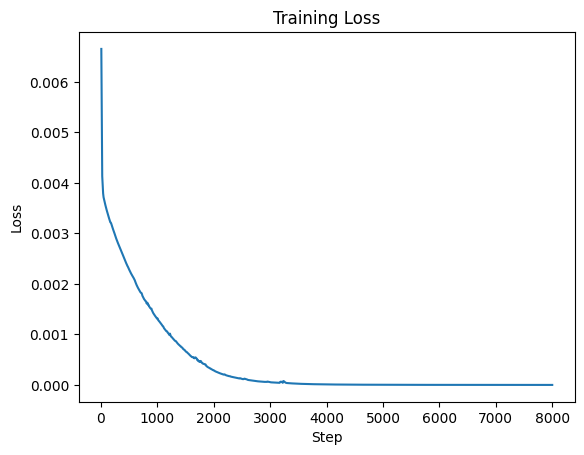

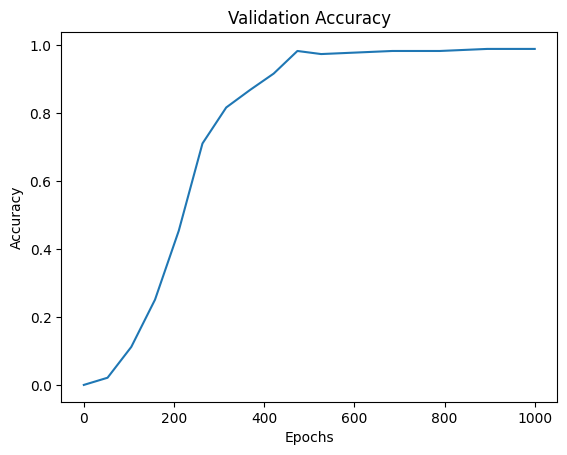

In [28]:
model.train(X_train, Y_train, n_epochs=1000, batch_size=256, lr=1e-4, plot=True, X_val=X_val, Y_val=Y_val, valStep=50)

In [29]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(1., dtype=float64)

In [31]:
model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 1, 2, 3, 4, 5]

In [19]:
buggy_model = generateBuggyModel(name, max_length)

In [20]:
print(buggy_model.model.params["token_embed"]["embeddings"])
print("-------")
print(buggy_model.model.params["transformer/layer_0/mlp/linear_1"])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [21]:
buggy_model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 5, 4, 3, 2, 1]

In [22]:
buggy_model.fastEvaluateEncoded(X_train, Y_train)

Array(0.00912017, dtype=float64)

In [23]:
buggy_model.train(X_train, Y_train, n_epochs=5000, batch_size=256, lr=1e-4, plot=True, X_val=X_val, Y_val=Y_val, valStep=50)

 39%|███▉      | 1941/5000 [04:54<07:44,  6.58it/s]


KeyboardInterrupt: 

In [ ]:
buggy_model.fastEvaluateEncoded(X_train, Y_train)

Array(0.95439914, dtype=float64)